In [1]:
import numpy as np 
import pandas as pd 

In [2]:
given_test_data = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
given_train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')

In [3]:
given_train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
given_test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
print(given_train_data.shape)
print(given_test_data.shape)

(20758, 18)
(13840, 17)


- The reason for one less column in the test dataset is that the train dataset has target values (labels) to perform the training process, while the test dataset does not.

In [6]:
given_train_data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Column Meanings

- family_history_with_overweight:Family history of obesity
- FAVC: Frequency of consumption of high-calorie foods
- FCVC: Frequency of vegetable consumption
- NCP: Number of main meals
- CAEC: Food consumption between meals
- SMOKE: Tobacco use
- CH20: Daily water consumption
- SCC: Monitoring calorie consumption13.
- FAF: Frequency of physical activity
- TUE: Time for using technological devices
- CALC: Alcohol consumption
- MTanANS: Mode of transport used
- NObeyesdad: Gives us the obesity status of the person

In [7]:
print(given_train_data["NObeyesdad"].unique())
class_counts = given_train_data["NObeyesdad"].value_counts()
class_counts

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

- Obesity_Type_III: Type III obesity, also known as extreme obesity, refers to people with a Body Mass Index (BMI) of 40 or above. This condition carries serious health risks.
- Obesity_Type_II: Type II obesity refers to a BMI between 35-39.9 and carries high health risks.
- Normal_Weight: Normal weight refers to a healthy body weight with a BMI between 18.5 and 24.9.
- Obesity_Type_I: Type I obesity refers to a BMI between 30-34.9 and is associated with moderate health risks.
- Insufficient_Weight: Insufficient weight refers to a BMI below 18.5, which can lead to various health problems.
- Overweight_Level_II: Overweight level II refers to a BMI approaching 30 but not yet classified as obesity. Usually people with a BMI between 28-29.9 fall into this category.
- Overweight_Level_I: Overweight level I refers to a BMI between 25-27.9 and carries mild health risks.

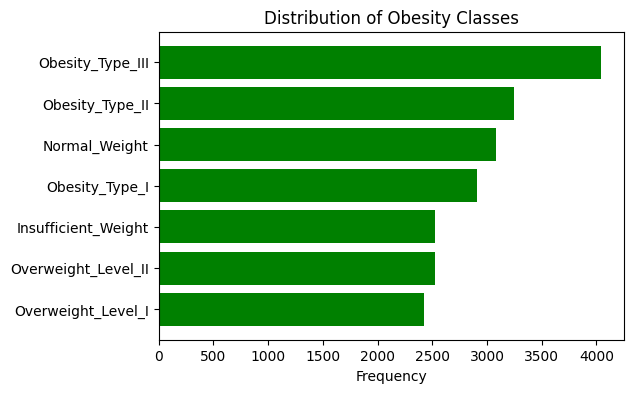

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.barh(class_counts.index, class_counts.values, color="green")
plt.xlabel("Frequency")
plt.title("Distribution of Obesity Classes")
plt.gca().invert_yaxis() ## Invert the y-axis to show the highest frequency class at the top
plt.show()

In [9]:
given_train_data.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

- There are no missing values in the data set

In [10]:
given_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [11]:
categorical_features = given_train_data.select_dtypes(include=['object']).columns
continuous_features = given_train_data.select_dtypes(include=['float64','int64']).columns

In [12]:
## Export categorical and continuous data to separate DataFrames

data_cat = given_train_data[categorical_features]
data_cont = given_train_data[continuous_features]
print(data_cat.columns)
print(data_cont.columns)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [13]:
data_id= data_cont["id"]
data_cont.drop('id',axis=1, inplace=True)

/tmp/ipykernel_33/1400423820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cont.drop('id',axis=1, inplace=True)


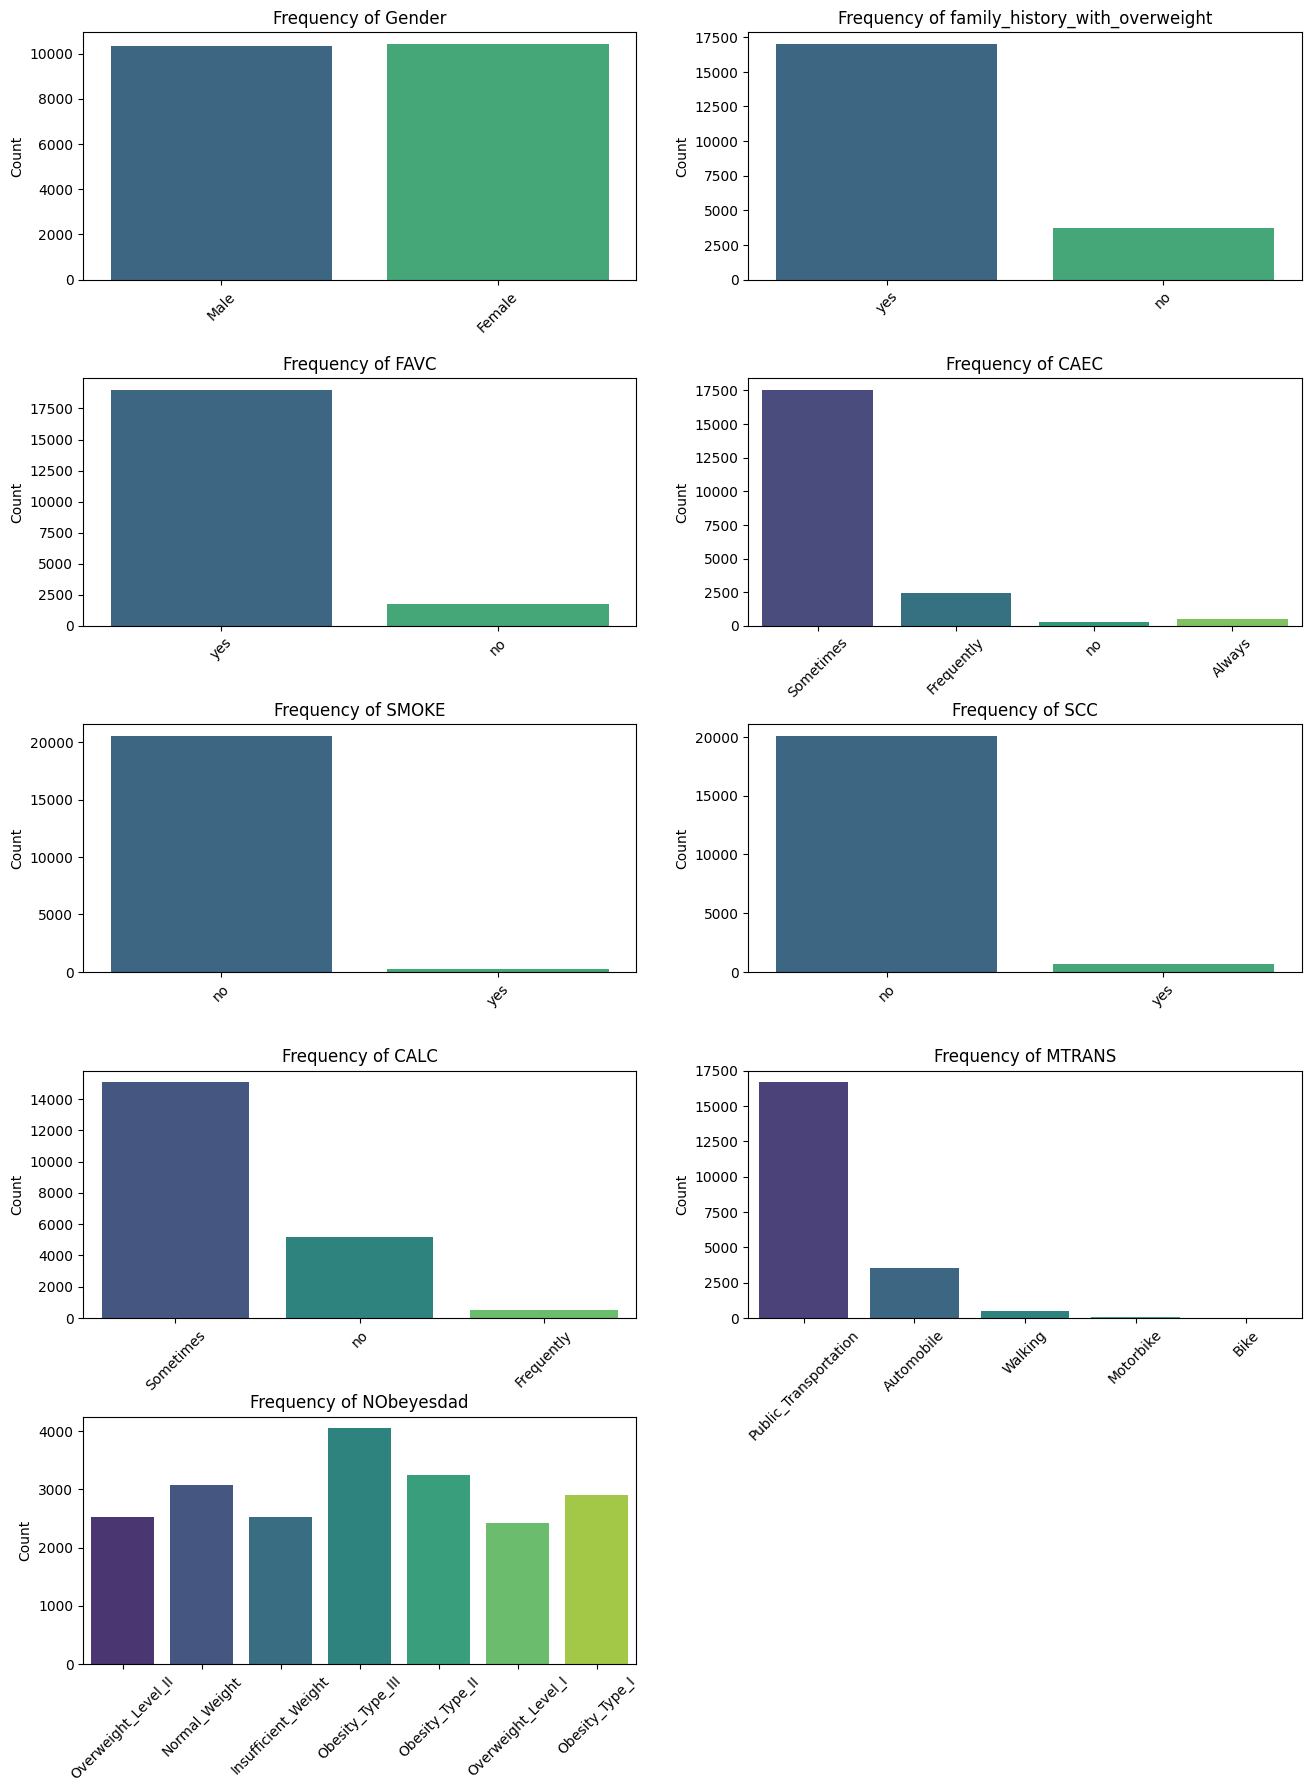

In [21]:
import seaborn as sns

## Drawing a frequency graph for each categorical variable
fig, axes = plt.subplots(nrows=(len(data_cat.columns)+1) // 2, ncols=2,figsize=(14, len(data_cat.columns) * 2))
fig.tight_layout(pad=5.0)

## Adjustment for proper positioning of the axes
axes = axes.ravel()

for i, col in enumerate(data_cat.columns):
    sns.countplot(x=data_cat[col], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

## Closing extra created axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.show()

- In the same way, we can also visualise continuous values

In [22]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

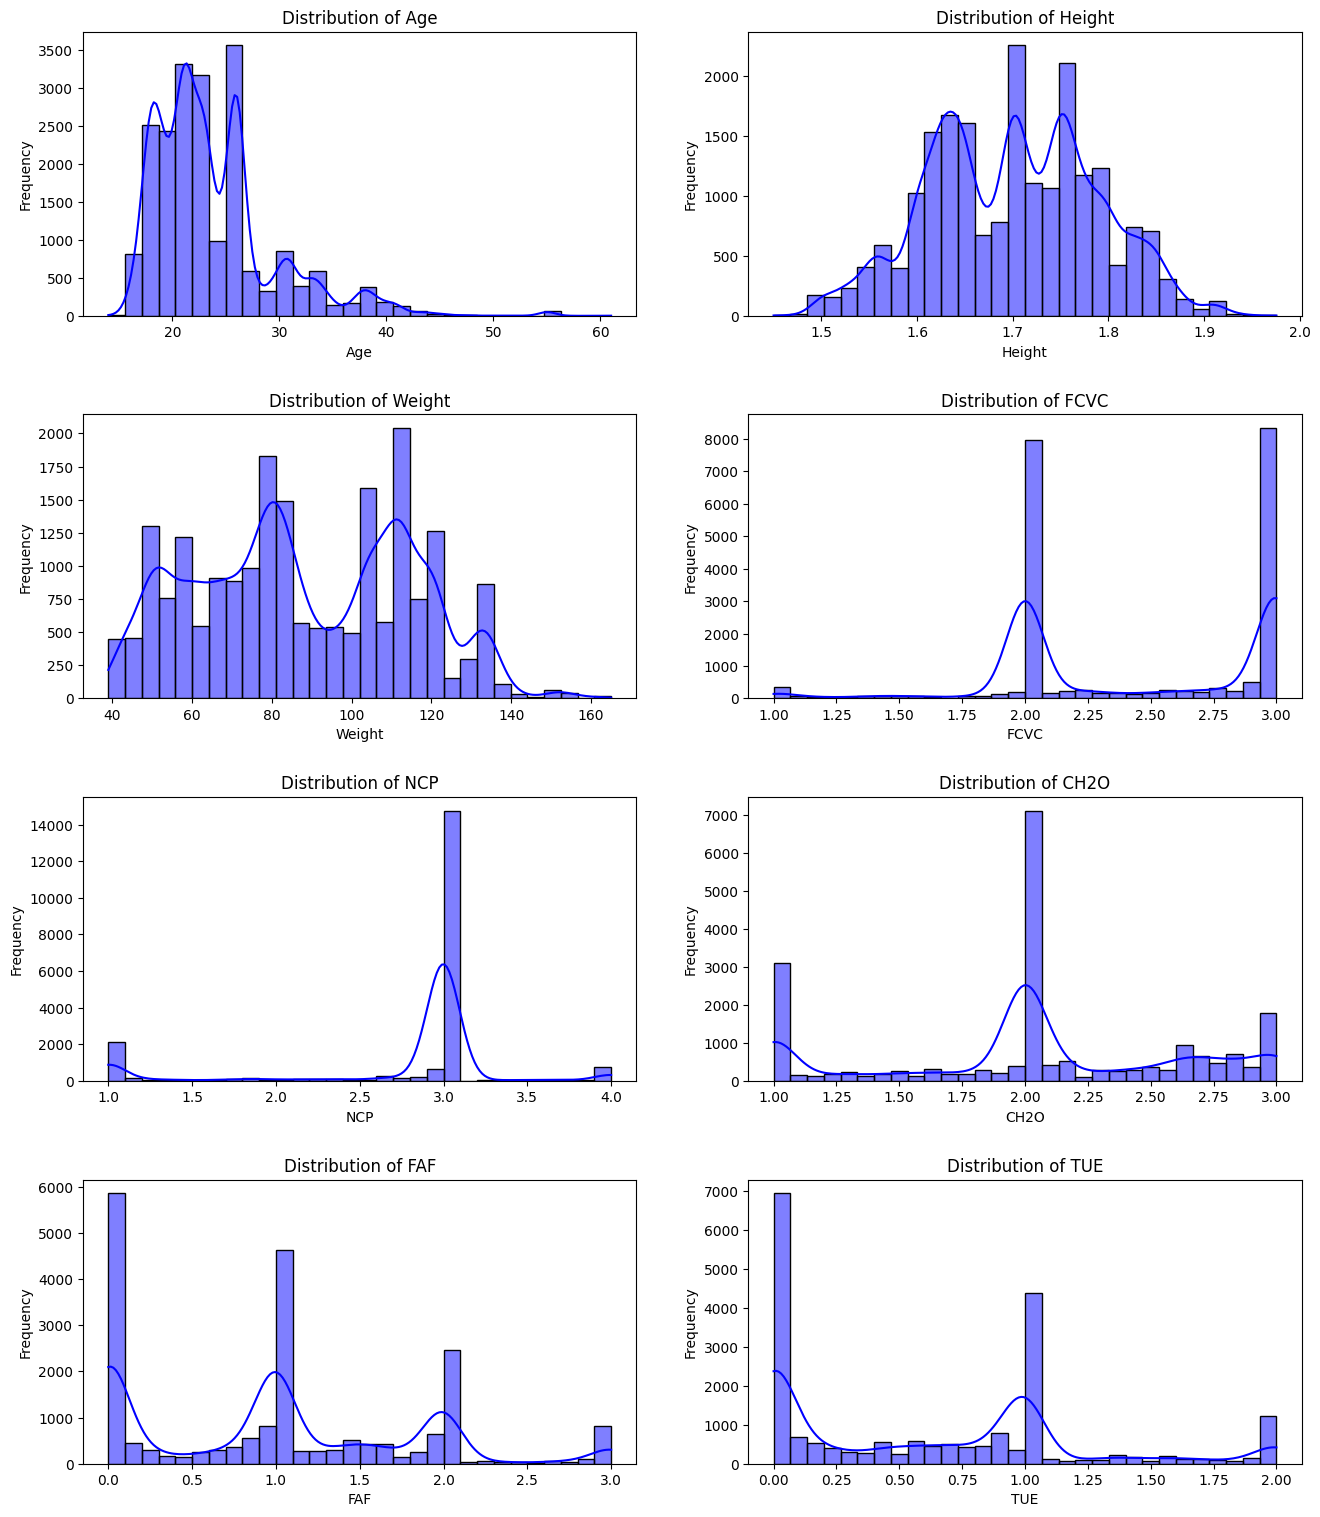

In [23]:
## Plotting histograms for continuous variables
fig, axes = plt.subplots(nrows=(len(data_cont.columns) + 1) // 2, ncols=2,figsize=(14, len(data_cont.columns) * 2))
fig.tight_layout(pad=5.0)

## Adjusting the axes for proper positioning
axes = axes.ravel()

for i, col in enumerate(data_cont.columns):
    sns.histplot(data_cont[col], ax=axes[i], kde=True, color='blue', bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
## Closing extra created axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.show()

In [24]:
data_cont.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [25]:
data_cat.describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


In [26]:
correlation_matrix = data_cont.corr()
correlation_matrix

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


- As can be seen, there is no high correlation in any pair of variables. In this case, we can select all columns as input to the model we will develop. However, let's first check whether there are outliers in these columns. We can use the box plot for this.

- Note: Before performing correlation analysis, it is healthier to check whether the variables are normally distributed and perform detailed correlation analysis according to these results. However, as an example, we have now performed Pearson Correlation without any statistical analysis before.

- It would be a good approach to examine the distribution of variables before correlation analysis. Especially Pearson correlation coefficient gives accurate results if the variables have a normal distribution and there is a linear relationship between the variables. However, if the variables are not normally distributed or their distributions are significantly skewed, the Pearson correlation coefficient may not be reliable. In this case, it is important to assess the distribution of the variables before performing correlation analysis. For non-normally distributed variables, non-parametric correlation coefficients such as Spearman or Kendall can be used. By examining the distributions of the variables, you can also determine appropriate preprocessing methods. For example, you can perform transformations for non-normally distributed variables or choose alternative correlation analysis methods.

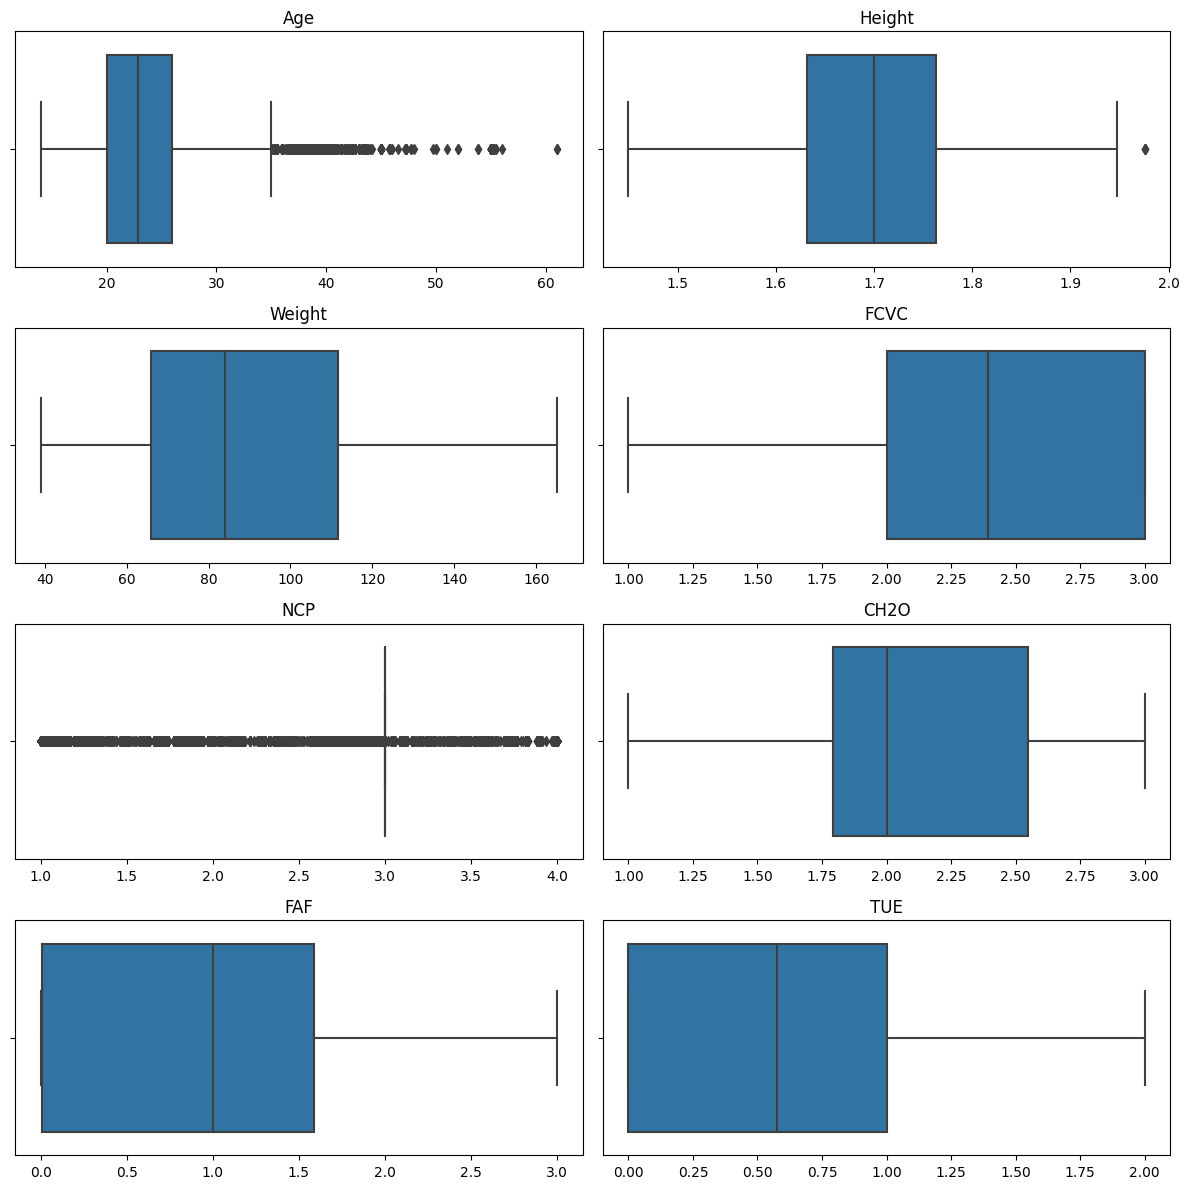

In [27]:
## Drawing box plots for continuous variables
num_columns = data_cont.columns
n_cols = 2
n_rows = (len(num_columns) + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate (num_columns):
    sns.boxplot(x=data_cont[col], ax=axes[i])
    
    axes[i].set_title(col)  ## Adds a title to a chart
    axes[i].set_xlabel('')  ## Clears the X axis
    
for i in range (len(num_columns), len(axes)):
    axes[i].set_visible (False)
    
plt.tight_layout()
plt.show()

- It is useful to normalize continuous variables before developing a model

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_cont_norm = pd.DataFrame(scaler.fit_transform(data_cont), columns=data_cont.columns)
data_cont_norm.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.222192,0.475586,0.338497,0.500000,0.661099,0.881787,0.000000,0.488237
1,0.085106,0.209260,0.142792,0.500000,0.666667,0.500000,0.333333,0.500000
2,0.085106,0.497391,0.088577,0.440267,0.137228,0.455189,0.288682,0.836792
3,0.147931,0.496002,0.732007,1.000000,0.666667,0.337031,0.489288,0.390099
4,0.375342,0.883049,0.434708,0.839832,0.323824,0.489924,0.655991,0.465861


- Before performing one-hot encoding, let's remove the Y target variable from the data set

In [31]:
Y = data_cat['NObeyesdad']

In [32]:
data_cat.drop("NObeyesdad", axis=1, inplace=True)


/tmp/ipykernel_33/4011532789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat.drop("NObeyesdad", axis=1, inplace=True)


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
Y_encoded_df = pd.DataFrame(Y_encoded, columns=['Encoded_Label'])

In [36]:
## Gets class labels and integer values used with Label encoding
class_labels = label_encoder.classes_
encoded_values = label_encoder.transform(class_labels)

## Create table
label_encoding_table = pd.DataFrame({'Orijinal Kategori': class_labels, 'Label Encoding Tamsayı Değeri': encoded_values})
print(label_encoding_table)

     Orijinal Kategori  Label Encoding Tamsayı Değeri
0  Insufficient_Weight                              0
1        Normal_Weight                              1
2       Obesity_Type_I                              2
3      Obesity_Type_II                              3
4     Obesity_Type_III                              4
5   Overweight_Level_I                              5
6  Overweight_Level_II                              6


In [37]:
data_cat.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [38]:
data_cat_encoded = pd.get_dummies(data_cat, drop_first=False)
data_cat_encoded.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,False,True,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
1,True,False,False,True,False,True,False,True,False,False,...,True,False,False,False,True,True,False,False,False,False
2,True,False,False,True,False,True,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
3,True,False,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
4,False,True,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False


- Let's merge our entire dataset and then separate it into Train and Validation. The reason we call it Validation is that the test dataset is already given to us, so it is better to name it this way to avoid confusion.

In [39]:
print(data_id.shape)
print(data_cat_encoded.shape)
print(data_cont_norm.shape)
print(Y_encoded_df.shape)

(20758,)
(20758, 22)
(20758, 8)
(20758, 1)


In [40]:
combined_data = pd.concat([data_id, data_cont_norm, data_cat_encoded,Y_encoded_df], axis=1)

In [41]:
combined_data.head(5)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Encoded_Label
0,0,0.222192,0.475586,0.338497,0.500000,0.661099,0.881787,0.000000,0.488237,False,...,False,False,True,False,False,False,False,True,False,6
1,1,0.085106,0.209260,0.142792,0.500000,0.666667,0.500000,0.333333,0.500000,True,...,False,False,False,True,True,False,False,False,False,1
2,2,0.085106,0.497391,0.088577,0.440267,0.137228,0.455189,0.288682,0.836792,True,...,False,False,False,True,False,False,False,True,False,0
3,3,0.147931,0.496002,0.732007,1.000000,0.666667,0.337031,0.489288,0.390099,True,...,False,False,True,False,False,False,False,True,False,4
4,4,0.375342,0.883049,0.434708,0.839832,0.323824,0.489924,0.655991,0.465861,False,...,False,False,True,False,False,False,False,True,False,6


In [43]:
 from sklearn.model_selection import train_test_split
Y = combined_data['Encoded_Label']
X = combined_data.drop(['Encoded_Label'], axis=1)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=0.15, random_state=42)
## Let's check the size of the training and validation sets
print("Eğitim seti boyutu:", X_train.shape)
print("Doğrulama seti boyutu:", X_validation.shape)
print("Eğitim Y boyutu:", Y_train.shape)
print("Doğrulama Y boyutu:", Y_validation.shape)


Eğitim seti boyutu: (17644, 31)
Doğrulama seti boyutu: (3114, 31)
Eğitim Y boyutu: (17644,)
Doğrulama Y boyutu: (3114,)


In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, Y_train)

accuracy = model.score(X_validation, Y_validation)
print("Doğruluk:", accuracy)

Doğruluk: 0.8930635838150289
